# Metodos Numéricos 
Apuntes codificados de Martín Cusme
## Metodos Analiticos
Manejo de grandes datos; Solucion exacta y conocida. Ejemplo:



In [2]:
import sympy as sp

a = sp.symbols('a')
ecuacion = a**2 - 1
solucion = sp.solve(ecuacion, a)
print(solucion)


[-1, 1]


## Metodos Numéricos


In [15]:
import sympy as sp
#Libreria utilizada solo en este ejemplo

x = sp.symbols('x')
integralDeX = sp.integrate(-a**2 )
print(integralDeX)


-a**3/3


# Tipos de errores
## Error de truncamiento
se tomará la constante 2(e) para este ejemplo y 5  cifras significativas

No existe función en python que nos permita truncar por lo tanto se lo tiene que hacer manualmente

In [68]:
import math
numero = 2*math.e
def truncar(numero, decimales):
    factor = 10 ** decimales
    return float(int(numero * factor)) / factor
print(truncar(numero, 4))


5.4365


## Error de redondeo



In [55]:
import math
numero = 2*math.e
numeroRedondeado = round(numero, 4)
print(numeroRedondeado)  


5.4366


## Representacion Numerica

In [81]:
def convertir_a_decimal(bit_signo, exp_codificado, frac):
    # Sesgo del exponente en IEEE 754 simple precisión
    sesgo = 127
    exp_real = exp_codificado - sesgo
    # La mantisa incluye el bit '1' seguido de la fracción
    mantisa_valor = 1 + frac
    # Se calcula el número en decimal
    numero = ((-1) ** bit_signo) * (2 ** exp_real) * mantisa_valor
    return numero
#Ejemplo
bit_signo = 1
exp_codificado = 125
frac = 0.625 
valor_resultado = convertir_a_decimal(bit_signo, exp_codificado, frac)
print(f"El número representado es: {valor_resultado}")



El número representado es: -0.40625


# Calculo de error
## Error real

In [129]:
import math
def calcularErrorReal(valorReal, valorAproximado):
    errorReal = valorReal - valorAproximado
    return errorReal

valorReal = 2 * math.e  #Valor exacto
valorAproximado = round(valorReal, 3)  #Valor aproximado con 3 cifras decimales por redondeo

errorReal = calcularErrorReal(valorReal, valorAproximado)
print(f"Valor real: {valorReal}")
print(f"Valor aproximado: {valorAproximado}")
print(f"Error real: {errorReal}")



Valor real: 5.43656365691809
Valor aproximado: 5.437
Error real: -0.0004363430819100955


## Error absoluto

In [127]:
import math

def ErrorAbsoluto(valorReal, valorAproximado):
    errorAbsoluto = abs(valorReal - valorAproximado)
    return errorAbsoluto

valorReal = 2*math.e  #Valor exacto
valorAproximado = round(valorReal, 3)  #Valor aproximado con 3 cifras decimales por redondeo
errorAbsoluto = calcularErrorAbsoluto(valorReal, valorAproximado)
print(f"Valor real: {valorReal:}")
print(f"Valor aproximado: {valorAproximado:}")
print(f"Error absoluto: {errorAbsoluto:.4f}")


Valor real: 5.43656365691809
Valor aproximado: 5.437
Error absoluto: 0.0004


## Error relativo

In [131]:
import math

def ErrorRelativo(valorReal, valorAproximado):
    errorRelativo = abs((valorReal - valorAproximado) / valorReal)
    return errorRelativo

valorReal = 2 * math.e  #Valor exacto
valorAproximado = round(valorReal, 3) #Valor aproximado con 3 cifras decimales por redondeo

errorRelativo = calcularErrorRelativo(valorReal, valorAproximado)
print(f"Valor real: {valorReal:}")
print(f"Valor aproximado: {valorAproximado:}")
print(f"Error relativo: {errorRelativo:.4f}")




Valor real: 5.43656365691809
Valor aproximado: 5.437
Error relativo: 0.0001


## Error relativo porcentual


In [133]:
import math

def ErrorRelativoPorcentual(valorReal, valorAproximado):
    errorRelativoPorcentual = abs((valorReal - valorAproximado) / valorReal)*100
    return errorRelativoPorcentual

valorReal = 2*math.e  #Valor exacto
valorAproximado = round(valorReal, 3)  #Valor aproximado con 3 cifras decimales por redondeo

errorRelativoPorcentual = ErrorRelativoPorcentual(valorReal, valorAproximado)
print(f"Valor real: {valorReal:}")
print(f"Valor aproximado: {valorAproximado:}")
print(f"Error relativo porcentual: {errorRelativoPorcentual:.4f} %")


Valor real: 5.43656365691809
Valor aproximado: 5.437
Error relativo porcentual: 0.0080 %



## Representacion Numerica en 32 bits para el número 160.5


In [161]:
def parteEnteraBinaria(entero):
    return bin(entero)[2:] if entero != 0 else "0"

def parteDecimalBinaria(decimal):
    binario = ""
    while decimal and len(binario) < 23:
        decimal *= 2
        bit = int(decimal)
        binario += str(bit)
        decimal -= bit
    return binario

def aIEEE754(numero):
    signo = "0" if numero >= 0 else "1"
    numero = abs(numero)
    
    parteEntera = int(numero)
    parteDecimal = numero - parteEntera

    binEntera = parteEnteraBinaria(parteEntera)
    binDecimal = parteDecimalBinaria(parteDecimal)

    if parteEntera > 0:
        normalizado = binEntera + binDecimal
        exponente = len(binEntera) - 1
        mantisa = normalizado[1:24].ljust(23, "0")
    else:
        posPrimerUno = binDecimal.find("1")
        exponente = -(posPrimerUno + 1)
        mantisa = binDecimal[posPrimerUno + 1 : posPrimerUno + 24].ljust(23, "0")
    
    expSesgado = f"{exponente + 127:08b}"
    return signo + expSesgado + mantisa

# Número para transformar:
numero = 160.5
ieee = aIEEE754(numero)
print(f"Representación IEEE 754 en 32 bits de {numero}: {ieee}")


Representación IEEE 754 en 32 bits de 160.5: 01000011001000001000000000000000


## Representacion Numerica en 64 bits para el número 160.5


In [163]:
def binEntera(entero):
    return bin(int(entero))[2:] if entero != 0 else "0"

def binDecimal(decimal, precision=52):
    binario = ""
    while decimal and len(binario) < precision:
        decimal *= 2
        bit = int(decimal)
        binario += str(bit)
        decimal -= bit
    return binario

def aIEEE64(numero):
    signo = '0' if numero >= 0 else '1'
    numero = abs(numero)

    parteEntera = int(numero)
    parteDecimal = numero - parteEntera

    binEnter = binEntera(parteEntera)
    binDec = binDecimal(parteDecimal)

    if parteEntera > 0:
        mantisaCompleta = binEnter + binDec
        exponente = len(binEnter) - 1
        mantisa = mantisaCompleta[1:53].ljust(52, '0')
    else:
        pos = binDec.find('1')
        if pos == -1:
            exponente = 0
            mantisa = '0' * 52
        else:
            exponente = -(pos + 1)
            mantisa = binDec[pos+1:pos+53].ljust(52, '0')

    expSesgado = exponente + 1023
    expBin = f"{expSesgado:011b}"

    return signo + expBin + mantisa

# Número para transformar
numero = 160.5
ieee64 = aIEEE64(numero)

print(f"Representación IEEE 754 (64 bits) de {numero}:")
print(f"Signo (1 bit): {ieee64[0]}")
print(f"Exponente (11 bits): {ieee64[1:12]}")
print(f"Mantisa (52 bits): {ieee64[12:]}")
print(f"Representación IEEE 754 64 bits de {numero}: {ieee64}")


Representación IEEE 754 (64 bits) de 160.5:
Signo (1 bit): 0
Exponente (11 bits): 10000000110
Mantisa (52 bits): 0100000100000000000000000000000000000000000000000000
Representación IEEE 754 64 bits de 160.5: 0100000001100100000100000000000000000000000000000000000000000000


## Aritmética de Computador


In [169]:
def normalizar(num):
    if num == 0:
        return 0.0
    while abs(num) >= 1:
        num /= 10
    return num

def suma(a, b):
    return normalizar(a + b)

def resta(a, b):
    return normalizar(a - b)

def multiplicar(a, b):
    return normalizar(a * b)

def dividir(a, b):
    if b == 0:
        raise ValueError("No se puede dividir entre cero")
    return normalizar(a / b)

def errorRelativoPorcentual(real, aprox):
    if real == 0:
        raise ValueError("El valor real no puede ser cero para calcular el error relativo.")
    return abs((real - aprox) / real) * 100

# Datos iniciales
numAprox = 0.82353
numReal = 14/17
otroAprox = 0.82350
otroReal = 0.823498

# Convertir a formato normalizado
flotA = normalizar(numAprox)
flotB = normalizar(otroAprox)

print(f"Números normalizados: {flotA}, {flotB}")
print(f"Suma: {suma(flotA, flotB)}")
print(f"Resta: {resta(flotA, flotB)}")
print(f"Multiplicación: {multiplicar(flotA, flotB)}")
print(f"División: {dividir(flotA, flotB)}")

# Resta aproximada y error relativo porcentual
restaAprox = resta(flotA, flotB)
valorReal = numReal - otroReal
error = errorRelativoPorcentual(valorReal, restaAprox)

print(f"Resta real: {valorReal}")
print(f"Resta aproximada: {restaAprox}")
print(f"Error relativo porcentual: {error}%")


Números normalizados: 0.82353, 0.8235
Suma: 0.164703
Resta: 2.999999999997449e-05
Multiplicación: 0.678176955
División: 0.10000364298724955
Resta real: 3.141176470589091e-05
Resta aproximada: 2.999999999997449e-05
Error relativo porcentual: 4.494382022579134%


## Convergencia, Divergencia y Tolerancia
**Convergencia:** Si al aumentar el numero de iteracion, los resultados se acercan cada vez mas a la solucion exacta

**Diverge:** Si los resultados se alejan indefinidamente o no se estabilizan.

**Tolerancia:** Es el limite aceptable del error que se impone para detener el metodo cuando se alcanza una solucion suficientemente buena, para ello se usa criterio de parada.

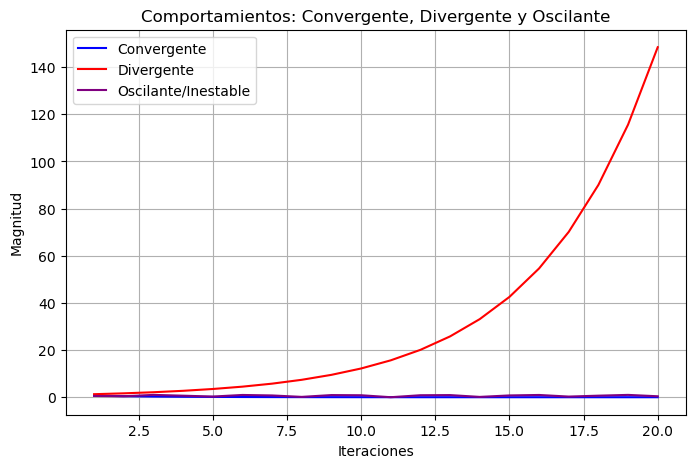

In [156]:
import matplotlib.pyplot as plt
import numpy as np

# Crear eje iteraciones
iteraciones = np.arange(1, 21)

# Funciones ejemplo para cada comportamiento
def comportamientoConvergente(x):
    return np.exp(-0.4 * x)  # decrecimiento

def comportamientoDivergente(x):
    return np.exp(0.25 * x)  #crecimiento

def comportamientoOscilante(x):
    return np.abs(np.cos(x))  #cambio seno a coseno

# Calcular valores
valoresConvergente = comportamientoConvergente(iteraciones)
valoresDivergente = comportamientoDivergente(iteraciones)
valoresOscilante = comportamientoOscilante(iteraciones)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(iteraciones, valoresConvergente, label="Convergente", color="blue")
plt.plot(iteraciones, valoresDivergente, label="Divergente", color="red")
plt.plot(iteraciones, valoresOscilante, label="Oscilante/Inestable", color="purple")

plt.xlabel("Iteraciones")
plt.ylabel("Magnitud")
plt.title("Comportamientos: Convergente, Divergente y Oscilante")
plt.legend()
plt.grid(True)
plt.show()


## Criterios de parada

Se utilizan dentro de los algoritmos para evitar lazos infinitos:

1. **Error absoluto**: $|p_N - p_{N-1}| < \epsilon$
2. **Error relativo**: $\frac{|p_N - p_{N-1}|}{|p_N|} < \epsilon,\quad p_N \ne 0$
3. **Valor de la función**: $|f(p_N)| < \epsilon$
4. **Número de iteraciones**: $i < K$
5. **Tiempo máximo**: $t < T\,[\text{ms}]$


In [182]:
import time

def metodoNewtonRaphson3x5(x0, maxIteraciones=15, tolerancia=1e-6, tiempoMax=5):
    
    def f(x):
        return 3*x**4-1

    def fPrime(x):
        return 12*x**3

    x = x0
    tiempoInicio = time.time()
    
    for i in range(1, maxIteraciones + 1):
        fx = f(x)
        fpx = fPrime(x)
        
        if fpx == 0:
            print(f"Derivada cero en la iteración {i}. No se puede continuar.")
            break

        xNueva = x - fx / fpx

        cambioX = abs(xNueva - x)
        valorF = abs(fx)

        if valorF < tolerancia:
            print(f"Converge por f < tolerancia en la iteración {i}.")
            break
        if cambioX < tolerancia:
            print(f"Converge por cambio pequeño en x en la iteración {i}.")
            break
        if time.time() - tiempoInicio > tiempoMax:
            print(f"Parada por límite de tiempo en la iteración {i}.")
            break

        x = xNueva
    else:
        print("Parada por máximo de iteraciones.")
    
    return x

# Ejemplo de uso
x0 = 1.0
resultado = metodoNewtonRaphson3x5(x0)
print(f"Raíz aproximada: {resultado}")


Converge por f < tolerancia en la iteración 5.
Raíz aproximada: 0.7598357377757363


## Método de la bisección

In [185]:
from math import sin, tan, exp
def signum(x):
    #Devuelve el signo de un número: '-', '0' o '+'
    if x > 0:
        return '+'
    elif x < 0:
        return '-'
    return '0'

def metodo_biseccion(funcion, a, b, tol, max_iteraciones):
    # Verificar que los extremos iniciales tienen signos opuestos
    fa = funcion(a)
    fb = funcion(b)
    if signum(fa) == signum(fb) and fa != 0:
        return None, 0, "La función debe cambiar de signo en el intervalo dado."

    # Cabecera de la tabla de resultados
    print("Iter\ta\t\tb\t\tp\t\tf(a)\tf(b)\tf(p)\tTOL")
    print("-"*90)
    
    iteracion = 0
    while iteracion < max_iteraciones:
        p = (a + b) / 2
        fp = funcion(p)
        tol_actual = abs(b - a) / 2
        
        # Imprimir solo signos para f(a), f(b), f(p) para no almacenar valores grandes
        print(f"{iteracion}\t{a:.6f}\t{b:.6f}\t{p:.6f}\t{signum(fa)}\t{signum(fb)}\t{signum(fp)}\t{tol_actual:.6f}")

        if abs(fp) < tol or tol_actual < tol:
            return p, iteracion, f"Convergencia alcanzada en {iteracion} iteraciones."

        if signum(fa) == signum(fp):
            a = p
            fa = fp
        else:
            b = p
            fb = fp

        iteracion += 1

    return None, iteracion, "El proceso falló después del número máximo de iteraciones."

# USO PARA PROBAR CON LAS FUNCIONES DADAS EN LOS EJERCICIOS
if __name__ == "__main__":
    def f(x):
        """Ejemplo con la primera funcion"""
        return x**3 +4*x**2 -10	

    a, b = 1,2
    tol = 1e-5
    max_iter = 100

    raiz, iteraciones, mensaje = metodo_biseccion(f, a, b, tol, max_iter)
    print("\nResultado final:")
    if raiz is not None:
        print(f"Raíz encontrada: {raiz:.8f}")
        print(f"Iteraciones realizadas: {iteraciones}")
    print(mensaje)

Iter	a		b		p		f(a)	f(b)	f(p)	TOL
------------------------------------------------------------------------------------------
0	1.000000	2.000000	1.500000	-	+	+	0.500000
1	1.000000	1.500000	1.250000	-	+	-	0.250000
2	1.250000	1.500000	1.375000	-	+	+	0.125000
3	1.250000	1.375000	1.312500	-	+	-	0.062500
4	1.312500	1.375000	1.343750	-	+	-	0.031250
5	1.343750	1.375000	1.359375	-	+	-	0.015625
6	1.359375	1.375000	1.367188	-	+	+	0.007812
7	1.359375	1.367188	1.363281	-	+	-	0.003906
8	1.363281	1.367188	1.365234	-	+	+	0.001953
9	1.363281	1.365234	1.364258	-	+	-	0.000977
10	1.364258	1.365234	1.364746	-	+	-	0.000488
11	1.364746	1.365234	1.364990	-	+	-	0.000244
12	1.364990	1.365234	1.365112	-	+	-	0.000122
13	1.365112	1.365234	1.365173	-	+	-	0.000061
14	1.365173	1.365234	1.365204	-	+	-	0.000031
15	1.365204	1.365234	1.365219	-	+	-	0.000015
16	1.365219	1.365234	1.365227	-	+	-	0.000008

Resultado final:
Raíz encontrada: 1.36522675
Iteraciones realizadas: 16
Convergencia alcanzada en 16 iteraciones.


In [4]:
!git status


On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   .ipynb_checkpoints/Untitled-checkpoint.ipynb
	new file:   .ipynb_checkpoints/Untitled1-checkpoint.ipynb
	new file:   .ipynb_checkpoints/apuntesMartinCusme-checkpoint.ipynb
	new file:   .ipynb_checkpoints/ejercicio1-checkpoint.ipynb
	new file:   .ipynb_checkpoints/ejercicio2-checkpoint.ipynb
	new file:   .ipynb_checkpoints/ejercicio4-checkpoint.ipynb
	new file:   .ipynb_checkpoints/informesem4-checkpoint.ipynb
	new file:   Untitled.ipynb
	new file:   Untitled1.ipynb
	new file:   apuntesMartinCusme.ipynb
	new file:   ejercicio1.ipynb
	new file:   ejercicio2.ipynb
	new file:   ejercicio4.ipynb
	new file:   informesem4.ipynb

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Untitled1.ipynb



In [ ]:
!git remote add origin https://github.com/MartinCusme/M-todos-num-ricos-apuntes.git
